In [1]:
# Options
path = ''
path = '/home/aelt/Dropbox/Apps/ShareLaTeX/peer-2-peer_markets/files/' # path to save files

### Load packages

In [2]:
import numpy as np
import cvxpy as cvx
from print_res_to_latex import *

## Problem data (IEEE14)

In [3]:
n = 14
Pmin = np.array([-21.7,-94.2,-47.8,-7.6,-11.2,-29.5,-9.,-3.5,-6.1,-13.5,-14.9,0.,0.,0.])
Pmax = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,20.,50.,10.])
Pren = np.array([0.,0.,0.,14.9,9.,10.,18.5,2.,7.,5.,5.,0.,0.,0.])
a = np.array([4.,1.,2.,10.,8.,4.,9.,15.,18.,7.,6.,7.,2.,8.])
b = np.array([130.,120.,135.,125.,140.,145.,150.,135.,140.,125.,120.,25.,10.,20.])
A = np.diag(a)

## Part 1: Centralized pool-based market

In [4]:
p = cvx.Variable(n)
qimp = cvx.Variable(1)
qexp = cvx.Variable(1)
obj = 1/2 * cvx.quad_form(p, A) + b*p + 70*qimp - 40*qexp
constraints = [
            cvx.sum(p) + qimp - qexp == 0, 
            Pmin + Pren <= p, 
            p <= Pmax + Pren, 
            qimp >= 0, 
            qexp >= 0
            ]
prob = cvx.Problem(cvx.Minimize(obj), constraints)
prob.solve(solver=cvx.MOSEK)
print(prob.value)
print("Schedule: ")
print(p.value)
write_schedule(p,path+'part1_schedule.txt','Schedule for pool-based market','part1-schedule')
print("Import: ", qimp.value[0], "\tExport: ", qexp.value[0])
print("Price: ",constraints[0].dual_value[0])
write_pricing(p,constraints[0].dual_value[0],path + 'part1_pricing.txt','Payments and revenues for pool-based market under uniform pricing scheme','part1-pricing')
print("Payments and revenues under uniform pricing scheme: ")
print(p.value * constraints[0].dual_value[0])
#print("Payments and revenues under uniform pricing scheme (with added renewables): ")
#print((p.value + np.matrix(Pren).T) * constraints[0].dual_value[0])

-3395.572644943102
Schedule: 
[-14.99996698 -50.00015996 -32.49988308   7.29999999  -2.19999997
 -18.74982567   9.49999999  -1.49999994   0.90000001  -7.85700578
  -8.33345189   6.42855887  30.00006739   6.25001133]
Writing table...
Done.
Import:  75.76165567804031 	Export:  -3.1369053391170306e-09
Price:  69.99999987021603
Writing pricing table...
Done.
Payments and revenues under uniform pricing scheme: 
[-1049.99768664 -3500.01119073 -2274.99181139   510.99999848
  -153.99999764 -1312.48779439   664.99999773  -104.99999568
    63.00000076  -549.99040331  -583.3416312    449.99911993
  2100.00471355   437.5007923 ]


#### No external agent:

In [5]:
p = cvx.Variable(n)
obj = 1/2 * cvx.quad_form(p, A) + b*p 
constraints = [
            cvx.sum(p) == 0, 
            Pmin + Pren<= p, 
            p <= Pmax + Pren
            ]
prob = cvx.Problem(cvx.Minimize(obj), constraints)
prob.solve(cvx.MOSEK)
print(prob.value)
print("Schedule: ")
print(p.value) 
write_schedule(p,path + 'part1_schedule_noext.txt','Schedule for pool-based market without external agent','part1-schedule-noext')
print("Price: ",constraints[0].dual_value)
print("Payments and revenues under uniform pricing scheme: ")
print(p.value * constraints[0].dual_value)
write_pricing(p,constraints[0].dual_value,path + 'part1_pricing_noext.txt','Payments and revenues for pool-based market under uniform pricing scheme without external agent','part1-pricing-noext')
#print("Payments and revenues under uniform pricing scheme (with added renewables): ")
#print((p.value + np.matrix(Pren).T) * constraints[0].dual_value)

-2462.983202141747
Schedule: 
[ -8.84543272 -25.38161658 -20.19092832   7.29999997  -2.19999985
 -12.59553371   9.49999994  -1.49999969   0.90000005  -4.34027346
  -4.23029489   9.94558108  42.31105156   9.32744662]
Writing table...
Done.
Price:  94.6189722498422
Payments and revenues under uniform pricing scheme: 
[ -836.94575264 -2401.58247458 -1910.44488629   690.7184944
  -208.16172486 -1191.77645461   898.88023073  -141.92842885
    85.15707943  -410.67221368  -400.26615507   941.04065977
  4003.42821364   882.55341261]
Writing pricing table...
Done.


## Part 2: Community-based market

In [6]:
p = cvx.Variable(n)
q = cvx.Variable(n)
alpha = cvx.Variable(n)
beta = cvx.Variable(n)
qimp = cvx.Variable(1)
qexp = cvx.Variable(1)
obj = 1/2*cvx.quad_form(p, A) + b*p + 70*qimp - 40*qexp
constraints = [
            p + q + alpha - beta == 0, 
            cvx.sum(q) == 0, 
            cvx.sum(alpha) == qimp, 
            cvx.sum(beta) == qexp, 
            Pmin + Pren <= p, 
            p <= Pmax + Pren, 
            qimp >= 0, 
            qexp >= 0, 
            alpha >= 0, 
            beta >= 0
            ]
prob = cvx.Problem(cvx.Minimize(obj), constraints)
prob.solve(cvx.MOSEK)
print(prob.value)
print("Schedule: ")
print(p.value)
write_schedule(p,path + 'part2_schedule.txt','Schedule for community-based market','part2-schedule')
print("Community trading: ")
print(q.value)
print("Agent import: ")
print(alpha.value)
print("Agent export: ")
print(beta.value)
print("Import: ", qimp.value, "\tExport: ", qexp.value)
price = abs(constraints[1].dual_value)
print("Price: ",price)
print("Payments and revenues under uniform pricing scheme: ")
print(p.value * price)
write_pricing(p,price,path + 'part2_pricing.txt','Payments and revenues for community-based market under uniform pricing scheme','part2-pricing')
#print("Payments and revenues under uniform pricing scheme (with added renewables): ")
#print((p.value + np.matrix(Pren).T) * constraints[0].dual_value)

-3395.5726428446114
Schedule: 
[-14.99996695 -50.00016007 -32.49988297   7.29999999  -2.19999997
 -18.74982551   9.49999998  -1.49999994   0.90000001  -7.85700565
  -8.33345198   6.42855886  30.00006744   6.25001134]
Writing table...
Done.
Community trading: 
[-60.7616885   50.00016007  32.49988297  -7.29999999   2.19999997
  18.74982551  -9.49999998   1.49999994  -0.90000001   7.85700565
   8.33345198  -6.42855886 -30.00006744  -6.25001134]
Agent import: 
[75.76165545 -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.        ]
Agent export: 
[-3.21367741e-09  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
Import:  [75.76165545] 	Export:  [-3.21367741e-09]
Price:  69.99999986990335
Payments and revenues under uniform pricing scheme: 
[-1049.99

## Changing the renewable generation of agent 7

In [7]:
Pren[6] = 0

### Pool-based (no external)

In [13]:
p = cvx.Variable(n)
obj = 1/2*cvx.quad_form(p, A) + b*p
constraints = [
            cvx.sum(p) == 0, 
            Pmin + Pren <= p, 
            p <= Pmax + Pren, 
            ]
prob = cvx.Problem(cvx.Minimize(obj), constraints)
prob.solve(cvx.MOSEK)
print(prob.value)
print("Schedule: ")
print(p.value)
write_schedule(p,path + 'part1_schedule_noext_a7changed.txt','Schedule for pool-based market without the external agent and without agent 7\'s production','part1-schedule-noext-a7changed')
print("Import: ", qimp.value, "\tExport: ", qexp.value)
print("Price: ",constraints[0].dual_value)
print("Payments and revenues under uniform pricing scheme: ")
print(p.value * constraints[0].dual_value)
write_pricing(p,constraints[0].dual_value,path + 'part1_pricing_noext_a7changed.txt','Payments and revenues for pool-based market under uniform pricing scheme without the external agent and without agent 7\'s production','part1-pricing-noext-a7changed')

-3527.196100469998
Schedule: 
[ -7.61793949 -20.4717585  -17.73587989   7.3         -2.19999998
 -11.36794101  -5.60797393  -1.49999996   0.90000001  -3.63882333
  -3.41196017  10.64689224  44.76413608   9.94124795]
Writing table...
Done.
Import:  [94.15075291] 	Export:  [1.80562469e-09]
Price:  99.5283142281432
Payments and revenues under uniform pricing scheme: 
[ -758.20067541 -2037.51961264 -1765.22222713   726.55669355
  -218.96228926 -1131.43200448  -558.15219158  -149.29246729
    89.57548339  -362.16595188  -339.5866442   1059.66723601
  4455.29900151   989.43564941]
Writing pricing table...
Done.


### Pool-based

In [9]:
p = cvx.Variable(n)
qimp = cvx.Variable(1)
qexp = cvx.Variable(1)
obj = 1/2*cvx.quad_form(p, A) + b*p + 70*qimp - 40*qexp
constraints = [
            cvx.sum(p) + qimp - qexp == 0, 
            Pmin + Pren <= p, 
            p <= Pmax + Pren, 
            qimp >= 0, 
            qexp >= 0
            ]
prob = cvx.Problem(cvx.Minimize(obj), constraints)
prob.solve(cvx.MOSEK)
print(prob.value)
print("Schedule: ")
print(p.value)
write_schedule(p,path + 'part1_schedule_a7changed.txt','Schedule for pool-based market without agent 7\'s production','part1-schedule-a7changed')
print("Import: ", qimp.value, "\tExport: ", qexp.value)
price = abs(constraints[0].dual_value[0])
print("Price: ",price)
print("Payments and revenues under uniform pricing scheme: ")
print(p.value * price)
write_pricing(p,price,path + 'part1_pricing_a7changed.txt','Payments and revenues for pool-based market under uniform pricing scheme without agent 7\'s production','part1-pricing-a7changed')

-4917.253226093275
Schedule: 
[-14.99999993 -50.00000016 -32.49999998   7.29999998  -2.19999995
 -18.74999811  -8.88885208  -1.49999992   0.90000002  -7.85714161
  -8.33333257   6.42857156  29.99999993   6.24999988]
Writing table...
Done.
Import:  [94.15075291] 	Export:  [1.80562469e-09]
Price:  69.99999974265384
Payments and revenues under uniform pricing scheme: 
[-1049.99999106 -3499.99999842 -2274.99999009   510.99999705
  -153.99999559 -1312.4998632   -622.21964333  -104.99999371
    63.00000145  -549.99991034  -583.33327756   450.00000725
  2099.9999874    437.49998966]
Writing pricing table...
Done.


### Community-based:

In [10]:
p = cvx.Variable(n)
q = cvx.Variable(n)
alpha = cvx.Variable(n)
beta = cvx.Variable(n)
qimp = cvx.Variable(1)
qexp = cvx.Variable(1)
obj = 1/2*cvx.quad_form(p, A) + b*p + 70*qimp - 40*qexp
constraints = [
            p + q + alpha - beta == 0, 
            cvx.sum(q) == 0, 
            cvx.sum(alpha) == qimp, 
            cvx.sum(beta) == qexp, 
            Pmin + Pren <= p, 
            p <= Pmax + Pren, 
            qimp >= 0, 
            qexp >= 0, 
            alpha >= 0, 
            beta >= 0
            ]
prob = cvx.Problem(cvx.Minimize(obj), constraints)
prob.solve(cvx.MOSEK)
print(prob.value)
print("Schedule: ")
print(p.value)
write_schedule(p,path + 'part2_schedule_a7changed.txt','Schedule for community-based market without agent 7\'s production','part2-schedule-a7changed')
print("Community trading: ")
print(q.value)
print("Agent import: ")
print(alpha.value)
print("Agent export: ")
print(beta.value)
print("Import: ", qimp.value, "\tExport: ", qexp.value)
price = abs(constraints[1].dual_value)
print("Price: ",price)
print("Payments and revenues under uniform pricing scheme: ")
print(p.value * price)
write_pricing(p,price,path + 'part2_pricing_a7changed.txt','Pricing for community-based market without agent 7\'s production','part2-pricing-a7changed')
#print("Payments and revenues under uniform pricing scheme (with added renewables): ")
#print((p.value + np.matrix(Pren).T) * constraints[0].dual_value)

-4917.253226093275
Schedule: 
[-14.99999993 -50.00000016 -32.49999998   7.29999998  -2.19999995
 -18.74999811  -8.88885208  -1.49999992   0.90000002  -7.85714161
  -8.33333257   6.42857156  29.99999993   6.24999988]
Writing table...
Done.
Community trading: 
[  14.99999993   50.00000016   32.49999998   -7.29999998    2.19999995
   18.74999811    8.88885208    1.49999992   -0.90000002    7.85714161
    8.33333257   -6.42857156 -124.15075284   -6.24999988]
Agent import: 
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 94.15075291  0.        ]
Agent export: 
[0.00000000e+00 1.80562469e-09 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Import:  [94.15075291] 	Export:  [1.80562469e-09]
Price:  69.99999974265384
Payments and revenues under uniform pricing scheme: 
[-1049.9999

# ADMM

In [16]:
from admm_community import solve_admm_community

p,price = solve_admm_community()
    
write_schedule(p,path + 'part3_schedule_community.txt','Schedule for community-based market solved with ADMM','part3-schedule-community')
write_pricing(p,price,path + 'part3_pricing_community.txt','Payments and revenues for community-based market solved with ADMM','part3-pricing-community')

Starting ADMM for community...
gamma:  40.0 , tau:  30.0 , rho:  50.0
Iteration: 2111
p:  [-15.0 -50.0 -32.5   7.3  -2.2 -18.7   9.5  -1.5   0.9  -7.9  -8.3   6.4  30.0   6.2]

q:  [  9.6  44.6  27.1 -12.7  -3.2  13.3 -14.9  -3.9  -6.3   2.4   2.9 -11.8 -35.4 -11.7]

alpha:  [5.4 5.4 5.4 5.4 5.4 5.4 5.4 5.4 5.4 5.4 5.4 5.4 5.4 5.4]

beta:  [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]

import:  75.74654758425007 , Export:  0.001974565765637235
market price:  69.9999930998206


# Part 4: Common and individual preference

In [18]:
def solve_community(A,b,Pmin,Pmax,Pren,gamma,tau):
    p = cvx.Variable(n)
    q = cvx.Variable(n)
    alpha = cvx.Variable(n)
    beta = cvx.Variable(n)
    qimp = cvx.Variable(1)
    qexp = cvx.Variable(1)
    obj = 1/2*cvx.quad_form(p, A) + b*p + (gamma+tau)*qimp - gamma*qexp
    constraints = [
                p + q + alpha - beta == 0, 
                cvx.sum(q) == 0, 
                cvx.sum(alpha) == qimp, 
                cvx.sum(beta) == qexp, 
                Pmin + Pren <= p, 
                p <= Pmax + Pren, 
                qimp >= 0, 
                qexp >= 0, 
                alpha >= 0, 
                beta >= 0
                ]
    prob = cvx.Problem(cvx.Minimize(obj), constraints)
    prob.solve(cvx.MOSEK)
    return p.value,abs(constraints[1].dual_value)

50

0.0

In [82]:
tauautvec = np.arange(0,40,.1)
Pmat = np.zeros((n,len(tauautvec)))
prices = np.zeros(len(tauautvec))
for i in range(len(tauautvec)):
    tauaut = tauautvec[i]
    Pmat[:,i],prices[i] = solve_community(A,b,Pmin,Pmax,Pren,40.0,30.0+tauaut)

### Plotting

In [83]:
import matplotlib.pyplot as plt

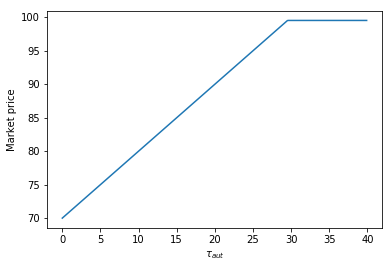

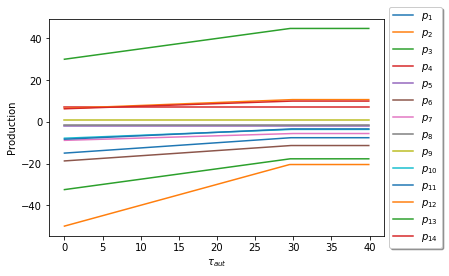

In [99]:
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(tauautvec,prices)
plt.xlabel('$\\tau_{aut}$')
plt.ylabel('Market price')
fig.savefig(path+'autonomy_price.eps')
plt.show()

fig = plt.figure()
ax = plt.subplot(111)

for i in range(n):
     line, = ax.plot(tauautvec,Pmat[i,:], label='$p_{%i}$'%(i+1))
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)
plt.xlabel('$\\tau_{aut}$')
plt.ylabel('Production')
fig.savefig(path+'autonomy_sched.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()